<a href="https://colab.research.google.com/github/MaickCross/ProjetoRegressaoT3/blob/main/RedeNeuralRL(FinalVersion).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as mticker

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style='whitegrid')

In [ ]:
# Carregar os dados do arquivo CSV a partir da URL
url = 'https://drive.google.com/uc?export=download&id=1UvWvhjUR5pMxGjcOuinRHykt5HX4m_sH'

try:
    instagram_data = pd.read_csv(url)
    print("Dados carregados com sucesso!")
    print("-" * 130)
    print(instagram_data.head())
    print("-" * 130)
except Exception as e:
    print(f"Erro ao carregar os dados: {e}")
    print("-" * 130)

instagram_data.head()


Dados carregados com sucesso!
----------------------------------------------------------------------------------------------------------------------------------
   rank channel_info  influence_score  posts followers avg_likes  \
0     1    cristiano               92   3.3k    475.8m      8.7m   
1     2  kyliejenner               91   6.9k    366.2m      8.3m   
2     3     leomessi               90  0.89k    357.3m      6.8m   
3     4  selenagomez               93   1.8k    342.7m      6.2m   
4     5      therock               91   6.8k    334.1m      1.9m   

  60_day_eng_rate new_post_avg_like total_likes        country  
0           1.39%              6.5m       29.0b          Spain  
1           1.62%              5.9m       57.4b  United States  
2           1.24%              4.4m        6.0b            NaN  
3           0.97%              3.3m       11.5b  United States  
4           0.20%            665.3k       12.5b  United States  
----------------------------------------

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


----------------------------------------------------------------------------------------------------------------------------------
followers             float64
posts                 float64
new_post_avg_like     float64
total_likes           float64
avg_likes             float64
followers_per_post    float64
influence_score         int64
dtype: object
----------------------------------------------------------------------------------------------------------------------------------
                   followers     posts  new_post_avg_like  total_likes  \
followers           1.000000  0.060398           0.300914     0.667539   
posts               0.060398  1.000000          -0.290080     0.233328   
new_post_avg_like   0.300914 -0.290080           1.000000     0.329326   
total_likes         0.667539  0.233328           0.329326     1.000000   
60_day_eng_rate    -0.100905 -0.324068           0.869202    -0.019524   
avg_likes           0.349195 -0.343087           0.845978     0.357940

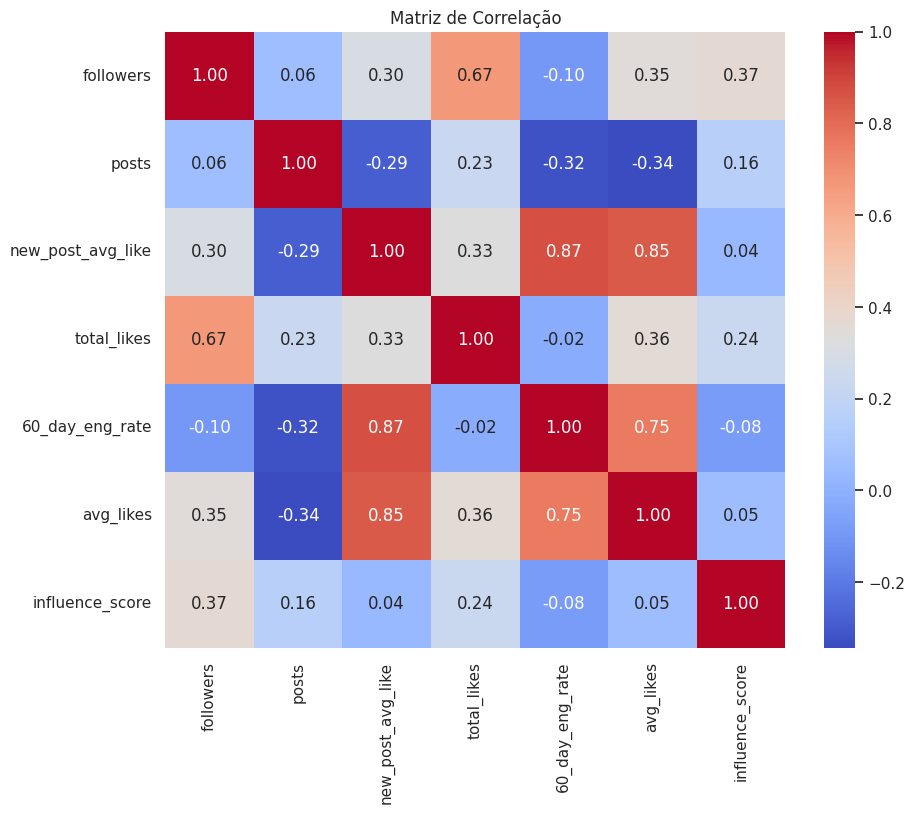

In [ ]:
# Selecionar as colunas relevantes para análise
columns_to_plot = ['followers', 'posts', 'new_post_avg_like', 'total_likes', '60_day_eng_rate', 'avg_likes', 'influence_score']
instagram_data_selected = instagram_data[columns_to_plot].dropna()

# Função para converter valores em formato de string para numéricos
def convert_to_numeric(value):
    if isinstance(value, str):
        value = value.lower()  # Para garantir que 'K', 'M', etc. em diferentes casos sejam tratados
        try:
            if "k" in value:
                return float(value.replace("k", "")) * 1e3
            elif "m" in value:
                return float(value.replace("m", "")) * 1e6
            elif "b" in value:
                return float(value.replace("b", "")) * 1e9
            elif "%" in value:
                return float(value.replace("%", ""))
        except ValueError:
            return np.nan  # Retornar NaN caso a conversão falhe
    return value

# Aplicar a conversão em cada coluna
instagram_data_numeric = instagram_data_selected.apply(lambda col: col.map(convert_to_numeric))
print("-" * 130)
print(X_test.dtypes)
print("-" * 130)

# Calcula a matriz de correlação
correlation_matrix = instagram_data_numeric.corr()
print(correlation_matrix)
print("-" * 130)

# Cria um mapa de calor para visualizar a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()


In [ ]:
# Função para remover outliers com base no IQR
def remove_outliers_iqr(df, columns):
    for column in columns:
        # Calcular os limites do IQR
        Q1 = df[column].quantile(0.25)  # Primeiro quartil
        Q3 = df[column].quantile(0.75)  # Terceiro quartil
        IQR = Q3 - Q1  # Intervalo interquartil
        lower_bound = Q1 - 1.5 * IQR  # Limite inferior
        upper_bound = Q3 + 1.5 * IQR  # Limite superior

        # Filtrar os dados dentro dos limites
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Criar uma nova feature que seja a razão entre 'followers' e 'posts'
instagram_data_numeric['followers_per_post'] = instagram_data_numeric['followers'] / instagram_data_numeric['posts']

# Atualizar as features X para incluir a nova coluna
X = instagram_data_numeric[['followers', 'posts', 'new_post_avg_like', 'total_likes', 'avg_likes','influence_score', 'followers_per_post']]

# Definir as colunas a verificar
columns_to_check = ['followers', 'posts', 'new_post_avg_like', 'total_likes', 'avg_likes','influence_score', 'followers_per_post']

# Converter colunas para valores numéricos (substituir valores não numéricos por NaN)
for column in columns_to_check:
    instagram_data_numeric[column] = pd.to_numeric(instagram_data_numeric[column], errors='coerce')

# Remover outliers do DataFrame
instagram_data_clean = remove_outliers_iqr(instagram_data_numeric, columns_to_check)

# Exibir as dimensões antes e depois
print(f"Dimensões antes: {instagram_data_numeric.shape}")
print(f"Dimensões depois: {instagram_data_clean.shape}")
print("-" * 130)

# Exibir os primeiros registros do DataFrame limpo
print(instagram_data_clean.head())
print("-" * 130)



Dimensões antes: (200, 8)
Dimensões depois: (107, 8)
----------------------------------------------------------------------------------------------------------------------------------
     followers   posts  new_post_avg_like   total_likes  60_day_eng_rate  \
33  85900000.0  1300.0          1100000.0  2.600000e+09             1.26   
34  85600000.0  1700.0           586500.0  2.300000e+09             0.69   
35  82300000.0  1800.0           482300.0  2.500000e+09             0.60   
36  81300000.0  3600.0          1200000.0  4.200000e+09             1.53   
37  81100000.0  3600.0           802900.0  5.600000e+09             1.00   

    avg_likes  influence_score  followers_per_post  
33  2100000.0               74        66076.923077  
34  1400000.0               85        50352.941176  
35  1400000.0               88        45722.222222  
36  1200000.0               88        22583.333333  
37  1600000.0               85        22527.777778  
-----------------------------------------

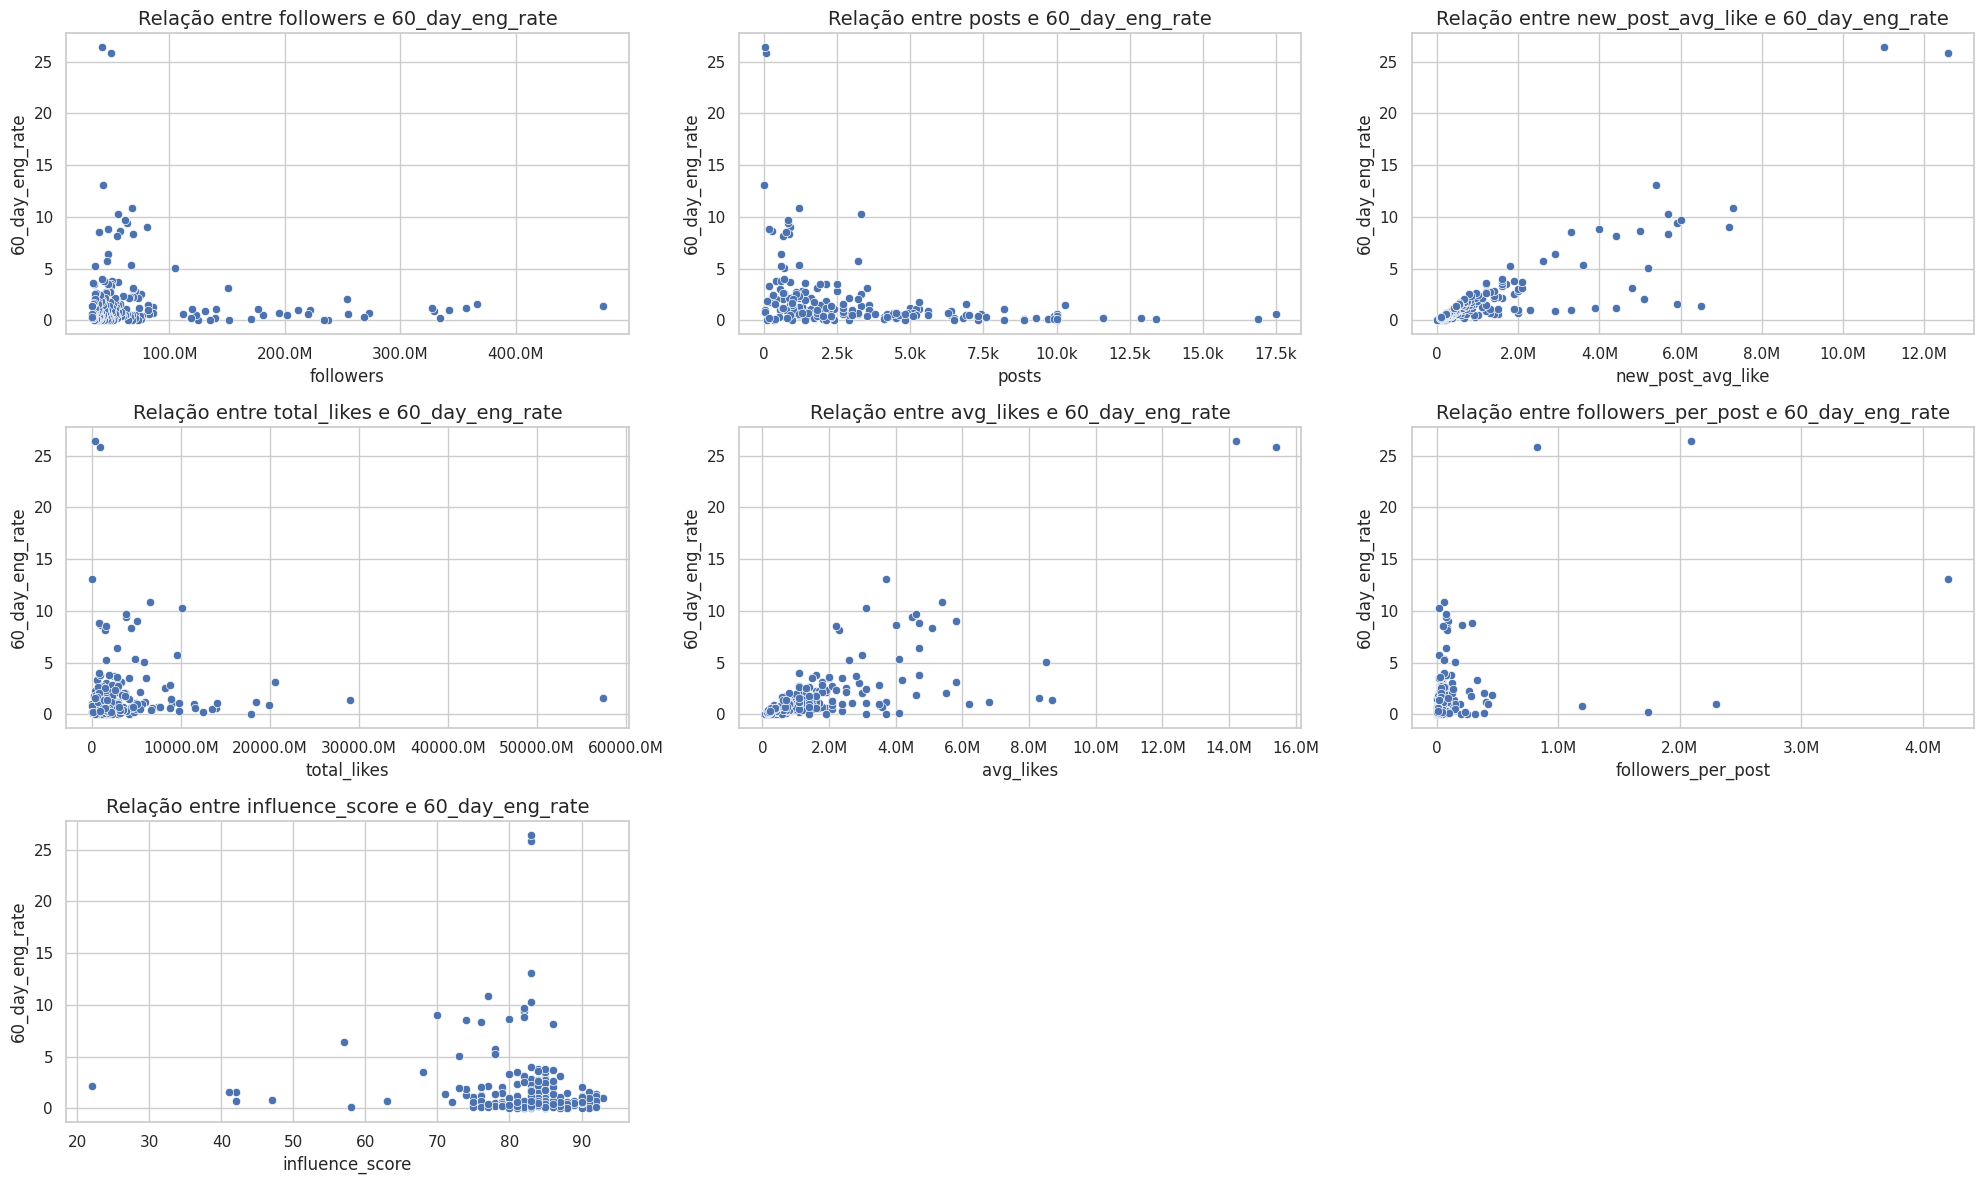

In [ ]:
# Certifique-se de que a função format_abbr está definida:
def format_abbr(value, _):
    if value >= 1_000_000:
        return f'{value / 1_000_000:.1f}M'
    elif value >= 1_000:
        return f'{value / 1_000:.1f}k'
    return str(int(value))

# Selecionar as colunas relevantes para a análise
target_columns = ['followers', 'posts', 'new_post_avg_like', 'total_likes', 'avg_likes','followers_per_post','influence_score']

# Substituir NaN pela mediana na variável-alvo
y = instagram_data_numeric['60_day_eng_rate'].fillna(instagram_data_numeric['60_day_eng_rate'].median())

# Atualizar X e y
X = instagram_data_numeric[target_columns]  # Features
y = instagram_data_numeric['60_day_eng_rate']  # Variável alvo

# Criar os gráficos com a formatação dos valores nos eixos
plt.figure(figsize=(20, 12))

for i, column in enumerate(target_columns, 1):
    plt.subplot(3, 3, i)  # Alterado para um grid 3x3 para acomodar 7 gráficos
    sns.scatterplot(
        x=instagram_data_numeric[column],
        y=instagram_data_numeric['60_day_eng_rate']
    )

    plt.title(f'Relação entre {column} e 60_day_eng_rate', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('60_day_eng_rate', fontsize=12)

    # Aplicar a formatação para os eixos X e Y
    ax = plt.gca()
    ax.xaxis.set_major_formatter(FuncFormatter(format_abbr))
    ax.yaxis.set_major_formatter(FuncFormatter(format_abbr))

plt.tight_layout()
plt.show()



   60_day_eng_rate
0             1.39
1             1.62
2             1.24
3             0.97
4             0.20
Erro Quadrático Médio (MSE): 0.41
Coeficiente de Determinação (R²): 0.93


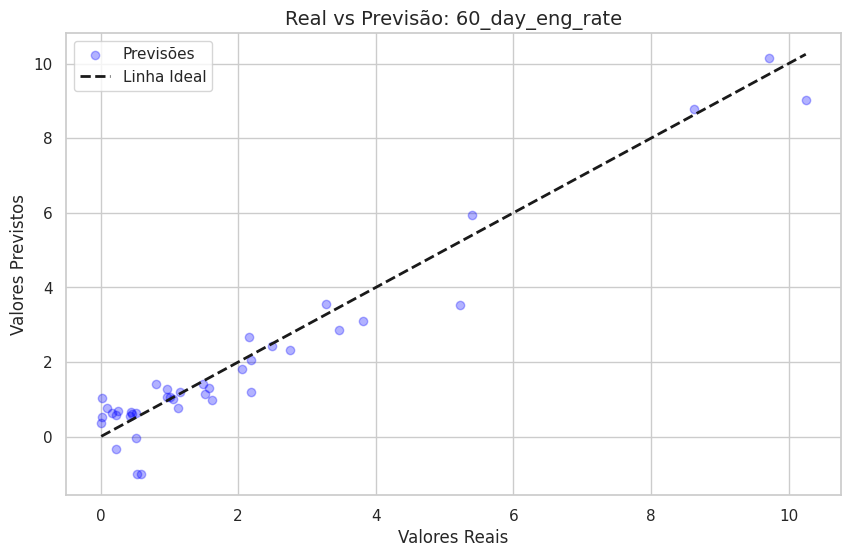

In [ ]:
# Selecionar as colunas relevantes para a análise
target_columns = ['followers', 'posts', 'new_post_avg_like', 'total_likes', 'avg_likes','followers_per_post','influence_score']

# Verificar os primeiros dados
print(instagram_data_numeric[['60_day_eng_rate']].head())

# Atualizar X e y
X = instagram_data_numeric[target_columns]  # As features são as colunas originais
y = instagram_data_numeric['60_day_eng_rate']  # A variável alvo

# Substituir NaN pela mediana na variável-alvo
y = instagram_data_numeric['60_day_eng_rate'].fillna(instagram_data_numeric['60_day_eng_rate'].median())

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Fazer previsões
y_pred = model.predict(X_test_scaled)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f}")

# Criar o gráfico Real vs Previsão
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3, color='blue', label='Previsões')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Linha Ideal')

# Adicionar rótulos e título
plt.xlabel('Valores Reais', fontsize=12)
plt.ylabel('Valores Previstos', fontsize=12)
plt.title('Real vs Previsão: 60_day_eng_rate', fontsize=14)
plt.legend()
plt.show()


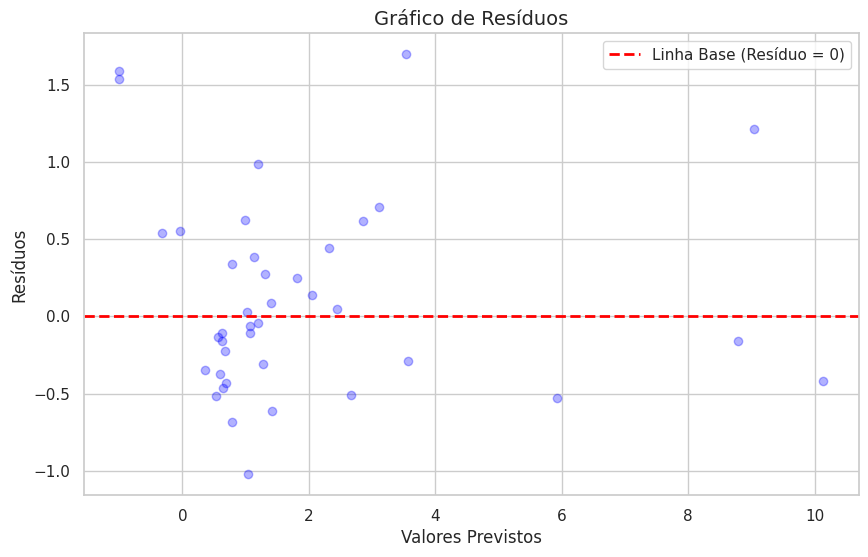

In [ ]:
# Calcular os resíduos
residuos = y_test - y_pred

# Criar o gráfico de resíduos
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuos, alpha=0.3, color='blue')
plt.axhline(0, color='red', linestyle='--', lw=2, label='Linha Base (Resíduo = 0)')

# Adicionar rótulos e título
plt.xlabel('Valores Previstos', fontsize=12)
plt.ylabel('Resíduos', fontsize=12)
plt.title('Gráfico de Resíduos', fontsize=14)
plt.legend()
plt.show()
